In [318]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift
from scipy.signal.windows import kaiser


def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

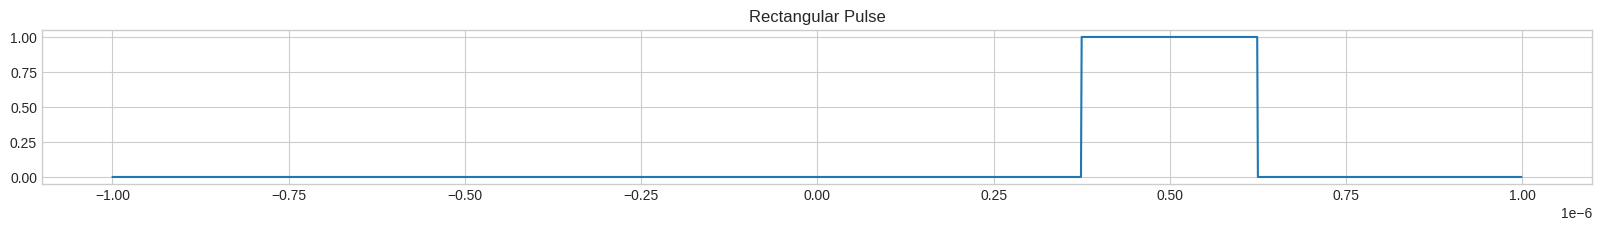

In [319]:
t = np.arange(-1e-6, 1e-6, 1e-9)  # Time vector
t0 = 0.5e-6  # Pulse center
T = 0.25e-6  # Pulse width

plt.figure(figsize=(20, 2))
plt.plot(t, rect((t - t0) / T))
plt.title("Rectangular Pulse")
plt.show()

In [320]:
# --- Parameters ---
fs = 1e9  # Sampling frequency
t = np.arange(-1e-6, 1e-6, 1 / fs)  # Time vector
T = 0.5e-6  # Pulse width
t0 = 0  # Pulse center
tc = 0  # Chirp center
K = 1.5e14  # Chirp rate

# --- LFM Signal in time domain ---
s_ref_t = rect((t - t0) / T) * np.exp(1j * np.pi * K * (t - t0 - tc) ** 2)

# --- LFM Signal in frequency domain ---
f = fftshift(fftfreq(len(t), 1 / fs))  # Frequency vector
S_ref_t = fftshift(fft(s_ref_t))  # Spectrum

# --- Matched Filter in frequency domain ---
H_ref_f = np.conj(S_ref_t)

# --- Matched Signal ---
S_mat_f = S_ref_t * H_ref_f
s_mat_t = ifftshift(ifft(S_mat_f))

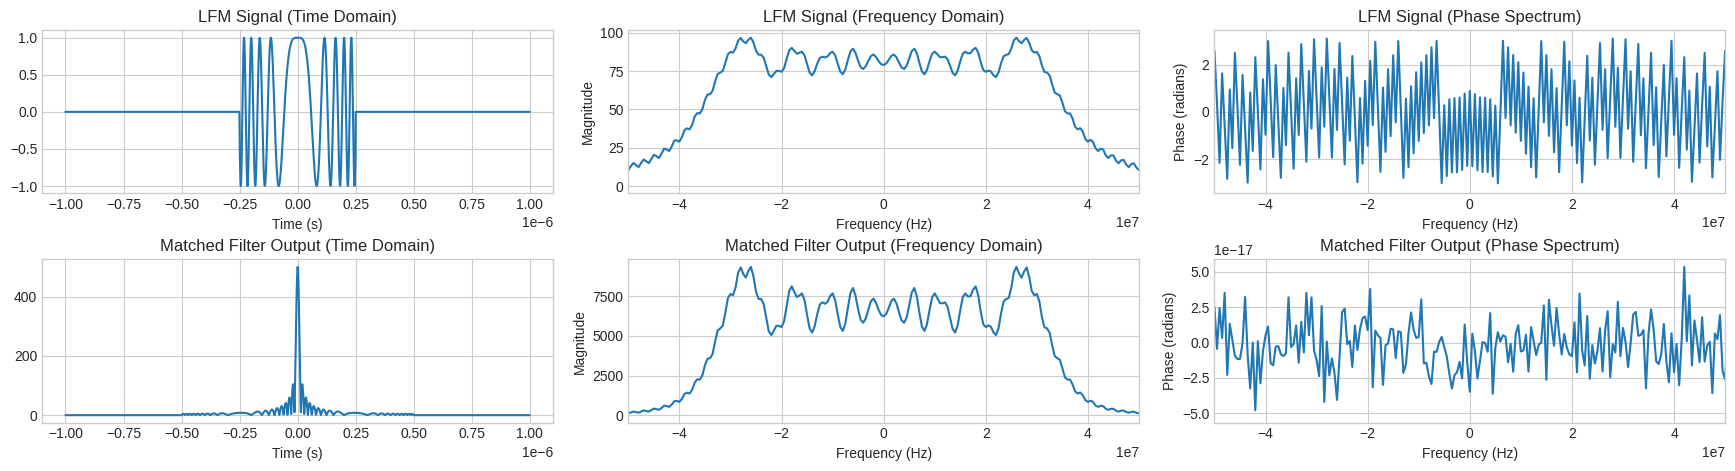

In [321]:
fig, axs = plt.subplots(2, 3, figsize=(18, 5))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(t, s_ref_t.real)
axs[0].set_title("LFM Signal (Time Domain)")
axs[0].set_xlabel("Time (s)")

axs[1].plot(f, np.abs(S_ref_t))
axs[1].set_title("LFM Signal (Frequency Domain)")
axs[1].set_xlim([-5e7, 5e7])
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")

axs[2].plot(f, np.angle(S_ref_t))
axs[2].set_title("LFM Signal (Phase Spectrum)")
axs[2].set_xlim([-5e7, 5e7])
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Phase (radians)")

axs[3].plot(t, np.abs(s_mat_t))
axs[3].set_title("Matched Filter Output (Time Domain)")
axs[3].set_xlabel("Time (s)")

axs[4].plot(f, np.abs(S_mat_f))
axs[4].set_title("Matched Filter Output (Frequency Domain)")
axs[4].set_xlim([-5e7, 5e7])
axs[4].set_xlabel("Frequency (Hz)")
axs[4].set_ylabel("Magnitude")

axs[5].plot(f, np.angle(S_mat_f))
axs[5].set_title("Matched Filter Output (Phase Spectrum)")
axs[5].set_xlim([-5e7, 5e7])
axs[5].set_xlabel("Frequency (Hz)")
axs[5].set_ylabel("Phase (radians)")

plt.show()

In [322]:
# --- Recieved Signal Parameters ---
t_rec = 0.5e-6
tc_rec = 0.125e-6

# --- Recieved LFM Signal in time domain ---
s_rec_t = rect((t - t_rec) / T) * np.exp(1j * np.pi * K * (t - t_rec - tc_rec) ** 2)
S_rec_t = fftshift(fft(s_rec_t))
S_rec_mat_f = S_rec_t * H_ref_f
s_rec_mat_t = ifftshift(ifft(S_rec_mat_f))

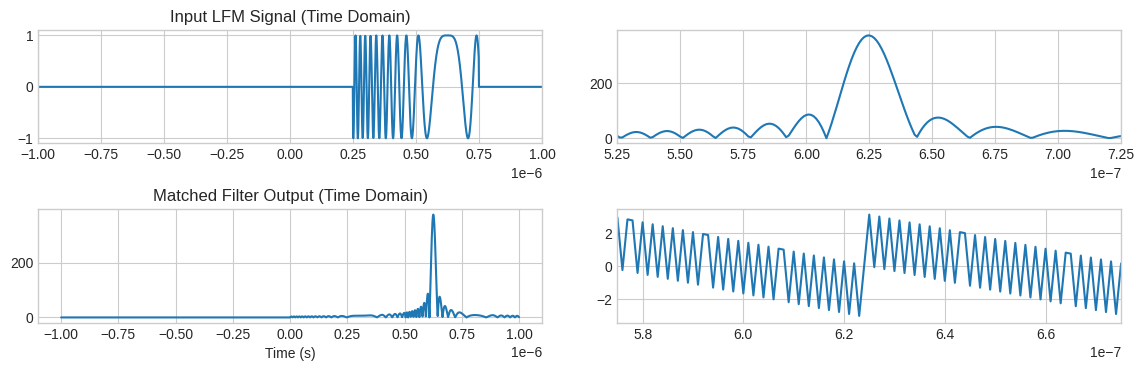

In [323]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(t, s_rec_t.real)
axs[0].set_title("Input LFM Signal (Time Domain)")
axs[0].set_xlim([-1e-6, 1e-6])

axs[1].plot(t, np.abs(s_rec_mat_t))
axs[1].set_xlim([(t_rec + tc_rec) - 0.1e-6, (t_rec + tc_rec) + 0.1e-6])

axs[2].plot(t, np.abs(s_rec_mat_t))
axs[2].set_title("Matched Filter Output (Time Domain)")
axs[2].set_xlabel("Time (s)")

axs[3].plot(t, np.angle(s_rec_mat_t))
axs[3].set_xlim([(t_rec + tc_rec) - 0.05e-6, (t_rec + tc_rec) + 0.05e-6])


plt.show()

In [324]:
# --- Parameters ---
beta = 2.5

# --- Kaiser Window ---
wk = kaiser(len(t), beta=beta)

# --- Smoothing Filter ---
ht = wk * np.exp(-1j * 2 * np.pi * K * t**2)
Hf = fftshift(fft(ht))

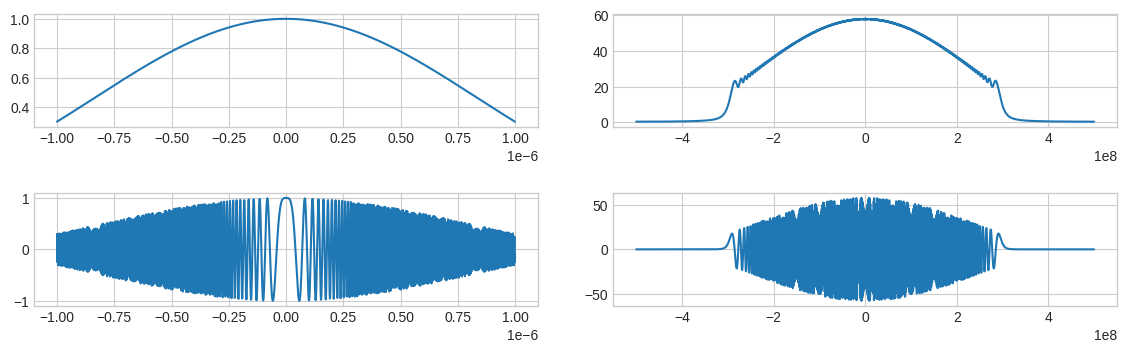

In [325]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(t, np.abs(ht))
axs[1].plot(f, np.abs(Hf))
axs[2].plot(t, ht.real)
axs[3].plot(f, Hf.real)

plt.show()

In [326]:
# --- Parameters ---
beta = 2.5  # Kaiser window parameter
gamma_w = 1.18  # Resolution improvement factor
alpha_os = fs / (np.abs(K) * T)  # Oversampling factor

rho = 0.886 * gamma_w / (np.abs(K) * T)

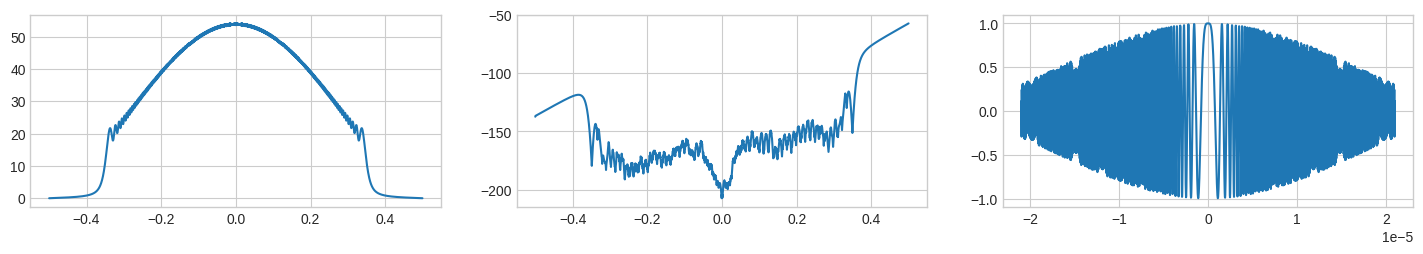

In [327]:
# --- RADARSAT Parameters ---
fs = 18.5e6  # Sampling frequency
dt = 1 / fs  # Sampling period
T = 42e-6  # Chirp duration
K = 0.41e12  # Chirp rate
alpha_os = fs / (np.abs(K) * T)  # Oversampling factor
beta = 2.5  # Roll-off factor for Kaiser window

N = 2048  # Number of samples
t = np.linspace(-T / 2, T / 2, N)  # Time vector
f = fftshift(fftfreq(len(t)))  # Frequency vector

wk = kaiser(N, beta=beta)

h2 = wk * np.exp(+1j * 2 * np.pi * K * t**2)
H2 = fftshift(fft(h2))

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
fig.tight_layout(pad=3.0)
axs = axs.ravel()

axs[0].plot(f, np.abs(H2))
axs[1].plot(f, np.unwrap(np.angle(H2, deg=True)))
axs[2].plot(t, h2)